Implementing ANN Dense Layer on Text 

In [2]:
import pandas as pd
import numpy  as np

In [3]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data( num_words=10000)

17464789/17464789 [==============================] - 2s 0us/step


In [4]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
train_labels[0]


1

In [6]:
max([max(sequence) for sequence in train_data])

9999

In [11]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]]) 


In [8]:
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [10]:
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [12]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [32]:
import numpy as np 
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data) 
x_test = vectorize_sequences(test_data)

In [47]:
x_train[0].sum()

120.0

In [34]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [35]:
from tensorflow import keras 
from tensorflow.keras import layers
model = keras.Sequential(
                            [
                            layers.Dense(16, activation="relu"),
                            layers.Dense(16, activation="relu"),
                            layers.Dense(1, activation="sigmoid")
                            ]
                         )

In [36]:
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

In [37]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [38]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 26ms/step - loss: 0.5408 - accuracy: 0.7822 - val_loss: 0.4278 - val_accuracy: 0.8438
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3444 - accuracy: 0.8889 - val_loss: 0.3651 - val_accuracy: 0.8546
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2613 - accuracy: 0.9129 - val_loss: 0.2910 - val_accuracy: 0.8878
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2129 - accuracy: 0.9302 - val_loss: 0.2785 - val_accuracy: 0.8887
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1789 - accuracy: 0.9398 - val_loss: 0.2813 - val_accuracy: 0.8860
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1510 - accuracy: 0.9528 - val_loss: 0.2879 - val_accuracy: 0.8852
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1300 - accuracy: 0.9589 - val_loss: 0.3075 - val_accuracy: 0.8829
Epoch 8/20
30

In [39]:
history_dict = history.history

In [40]:
history_dict

{'loss': [0.5407881736755371,
  0.34435027837753296,
  0.26129570603370667,
  0.21286505460739136,
  0.17894956469535828,
  0.1509905755519867,
  0.1300003081560135,
  0.11524351686239243,
  0.09699968248605728,
  0.08350246399641037,
  0.07202151417732239,
  0.05939183011651039,
  0.05533837899565697,
  0.043684814125299454,
  0.038708291947841644,
  0.03349851071834564,
  0.028345348313450813,
  0.022244032472372055,
  0.018238350749015808,
  0.017330065369606018],
 'accuracy': [0.7821999788284302,
  0.8889333605766296,
  0.912933349609375,
  0.9301999807357788,
  0.9398000240325928,
  0.9527999758720398,
  0.9589333534240723,
  0.9661999940872192,
  0.9718666672706604,
  0.9765999913215637,
  0.9806666374206543,
  0.9868000149726868,
  0.9872666597366333,
  0.990933358669281,
  0.9915333390235901,
  0.993066668510437,
  0.9937333464622498,
  0.9969333410263062,
  0.9983333349227905,
  0.9973333477973938],
 'val_loss': [0.4277908205986023,
  0.3651149570941925,
  0.29100045561790466,

In [41]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

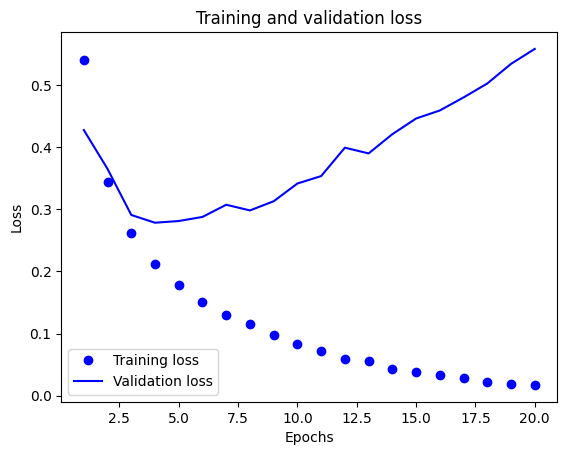

In [42]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss") 
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

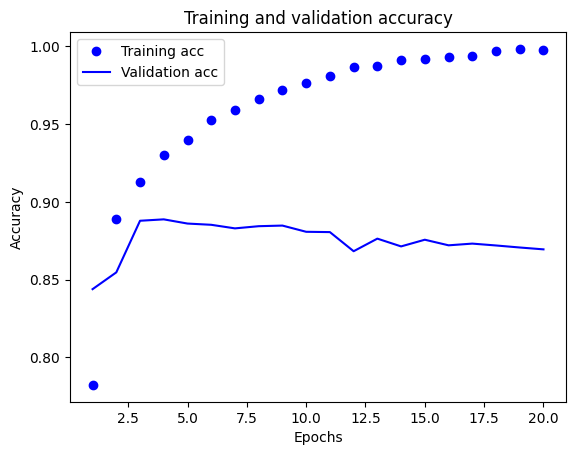

In [43]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [48]:
model = keras.Sequential([
 layers.Dense(16, activation="relu"),
 layers.Dense(16, activation="relu"),
 layers.Dense(1, activation="sigmoid")
 ])


In [49]:
model.compile(optimizer="rmsprop",
 loss="binary_crossentropy",
 metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 9ms/step - loss: 0.4656 - accuracy: 0.8194
Epoch 2/4
49/49 [==============================] - 0s 9ms/step - loss: 0.2794 - accuracy: 0.9017
Epoch 3/4
49/49 [==============================] - 0s 9ms/step - loss: 0.2186 - accuracy: 0.9205
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.2876 - accuracy: 0.8840


In [51]:
model.predict(x_test[0].reshape(1,10000))

1/1 [==============================] - 0s 194ms/step


array([[0.178203]], dtype=float32)

In [57]:
x_test.shape

(25000, 10000)

In [59]:
model.predict(x_test[500].reshape(1,10000))

1/1 [==============================] - 0s 116ms/step


array([[0.9678352]], dtype=float32)

In [60]:
y_test[500]

1.0